<b>Multiview Learning</b>

- Multiview learning is learning with multiple views of the same data to improve generalization performance
- Co-training is a semi-supervised learning technique that requires two views of the data.
It assumes that each example is described using two different  sets of features that provide complimentary information about the
instance

In [1]:
from sklearn.model_selection import train_test_split
from mvlearn.semi_supervised import CTClassifier
from mvlearn.datasets import load_UCImultifeature
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
n_class = 2
data, labels = load_UCImultifeature(select_labeled=list(range(n_class)), views=[0, 1])
X1 = data[0]  # Only using the first view
X1_train, X1_test, l_train, l_test = train_test_split(X1, labels, random_state=42, test_size=0.33)

In [8]:
cl1 = GaussianNB()
cl2 = LogisticRegression()
ctc = CTClassifier(cl1, cl2, random_state=1)
ctc = ctc.fit([X1_train, X1_train], l_train)
preds = ctc.predict([X1_test, X1_test])
print("Accuracy: ", sum(preds==l_test) / len(preds))

Accuracy:  0.4090909090909091


In [6]:
X2 = data[1]
X2_train, X2_test, l_train, l_test = train_test_split(X2, labels,test_size=0.33)
cl1 = GaussianNB()
cl2 = LogisticRegression()
ctc = CTClassifier(cl1, cl2, random_state=1)
ctc = ctc.fit([X2_train, X2_train], l_train)
preds = ctc.predict([X2_test, X2_test])
print("Accuracy: ", sum(preds==l_test) / len(preds))

Accuracy:  0.9848484848484849


c:\users\favas\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Multiview KMeans

In [4]:
from mvlearn.datasets import load_UCImultifeature
from mvlearn.cluster import MultiviewKMeans
from sklearn.cluster import KMeans
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

RANDOM_SEED = 5
n_class = 5
Xs, labels = load_UCImultifeature(
    select_labeled=list(range(n_class)), views=[0, 1])


# Helper function to display data and the results of clustering
def display_plots(pre_title, data, labels):
    # plot the views
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    dot_size = 10
    ax[0].scatter(data[0][:, 0], data[0][:, 1], c=labels, s=dot_size)
    ax[0].set_title(pre_title + ' View 1')
    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].axes.get_yaxis().set_visible(False)

    ax[1].scatter(data[1][:, 0], data[1][:, 1], c=labels, s=dot_size)
    ax[1].set_title(pre_title + ' View 2')
    ax[1].axes.get_xaxis().set_visible(False)
    ax[1].axes.get_yaxis().set_visible(False)

    plt.show()

In [5]:
# Use the MultiviewKMeans instance to cluster the data
m_kmeans = MultiviewKMeans(n_clusters=n_class, random_state=RANDOM_SEED)
m_clusters = m_kmeans.fit_predict(Xs)
# Compute nmi between true class labels and multiview cluster labels
m_nmi = normalized_mutual_info_score(labels, m_clusters)
print('Multiview NMI Score: {0:.3f}\n'.format(m_nmi))

Multiview NMI Score: 0.693



Multiview spectral clustering

In [6]:
# License: MIT

import warnings
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.datasets import make_moons


from mvlearn.cluster import MultiviewSpectralClustering
from mvlearn.plotting import quick_visualize

warnings.simplefilter('ignore')  # Ignore warnings
RANDOM_SEED = 10

In [7]:
def display_plots(pre_title, data, labels):
    # plot the views
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    dot_size = 10
    ax[0].scatter(data[0][:, 0], data[0][:, 1], c=labels, s=dot_size)
    ax[0].set_title(pre_title + ' View 1')
    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].axes.get_yaxis().set_visible(False)

    ax[1].scatter(data[1][:, 0], data[1][:, 1], c=labels, s=dot_size)
    ax[1].set_title(pre_title + ' View 2')
    ax[1].axes.get_xaxis().set_visible(False)
    ax[1].axes.get_yaxis().set_visible(False)

    plt.show()


# A function to generate the moons data
def create_moons(seed, num_per_class=200):
    np.random.seed(seed)
    data = []
    labels = []

    for view in range(2):
        v_dat, v_labs = make_moons(num_per_class*2,
                                   random_state=seed + view, noise=0.05,
                                   shuffle=False)
        if view == 1:
            v_dat = v_dat[:, ::-1]

        data.append(v_dat)
    for ind in range(len(data)):
        labels.append(ind * np.ones(num_per_class,))
    labels = np.concatenate(labels)

    return data, labels


# Generating the data
m_data, labels = create_moons(RANDOM_SEED)
n_class = 2

In [8]:
m_spectral = MultiviewSpectralClustering(n_clusters=n_class,
                                         affinity='nearest_neighbors',
                                         max_iter=12, random_state=RANDOM_SEED,
                                         n_init=10)
m_clusters = m_spectral.fit_predict(m_data)

# Compute nmi between true class labels and multi-view cluster labels
m_nmi = normalized_mutual_info_score(labels, m_clusters)
print('Multi-view NMI Score: {0:.3f}\n'.format(m_nmi))

Multi-view NMI Score: 0.721



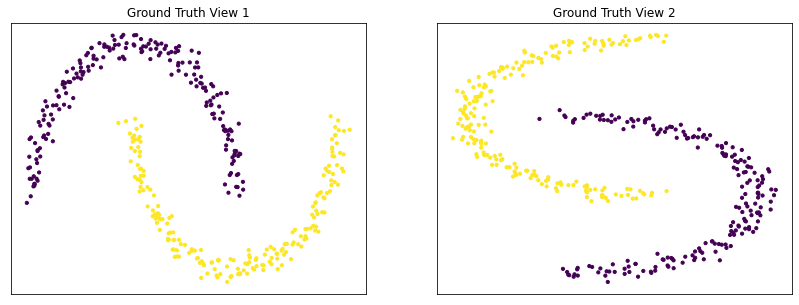

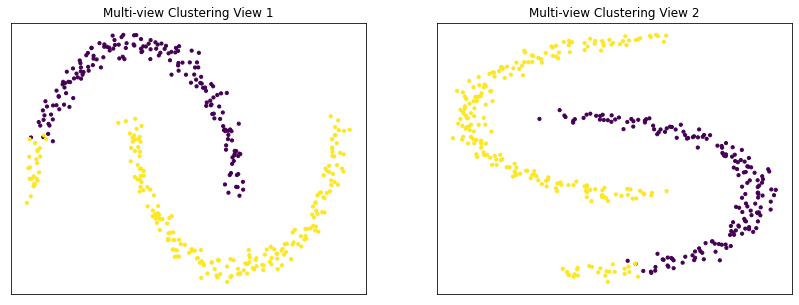

In [9]:
display_plots('Ground Truth', m_data, labels)
display_plots('Multi-view Clustering', m_data, m_clusters)

References:
1. Perry, Ronan, et al. "mvlearn: Multiview Machine Learning in Python." Journal of Machine Learning Research 22.109 (2021): 1-7
2. https://mvlearn.github.io/auto_examples/cluster/plot_mv_kmeans_tutorial.html#sphx-glr-auto-examples-cluster-plot-mv-kmeans-tutorial-py
3. https://mvlearn.github.io/auto_examples/cluster/plot_mv_spectral_tutorial.html#sphx-glr-auto-examples-cluster-plot-mv-spectral-tutorial-py